# Creating, importing and visualising network data
A network comprises a set of nodes, some connected by edges. This can be visualised with symbols and lines:

![simple_example_net.png](figures/simple_example_net.png)

### Where do the lines come from?
* **Interviews, questionaires** - who provides you with information important for your work?
* **Archives, databases** - transactions between firms; ownership of firms; co-authorship of articles or patents

#### Frequently collated as an Edgelist:

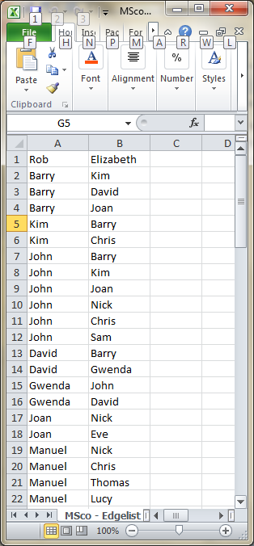

## Networkx
This is the key library that we will use in the module. The library is well documented. All the info is here https://networkx.github.io/documentation/latest/tutorial.html

In [1]:
# networkx comes with anaconda. You need just to import it
import networkx as nx

In [2]:
# networks are storded in a new data type - a Graph Object
G=nx.Graph()
# this is an empty undirected graph

In [3]:
G

In [4]:
# networks comprise edges among nodes
# adding edges between nodes
G.add_edge(1,2)
G.add_edge(2,3)
# node ids are unique
print (G.edges())

[(1, 2), (2, 3)]


In [5]:
# or add from a list
l=[[2,4], [3,4]]

G.add_edges_from(l)
print (G.edges())

[(1, 2), (2, 3), (2, 4), (3, 4)]


In [6]:
print (G.nodes())

[1, 2, 3, 4]


### Visualising a Network

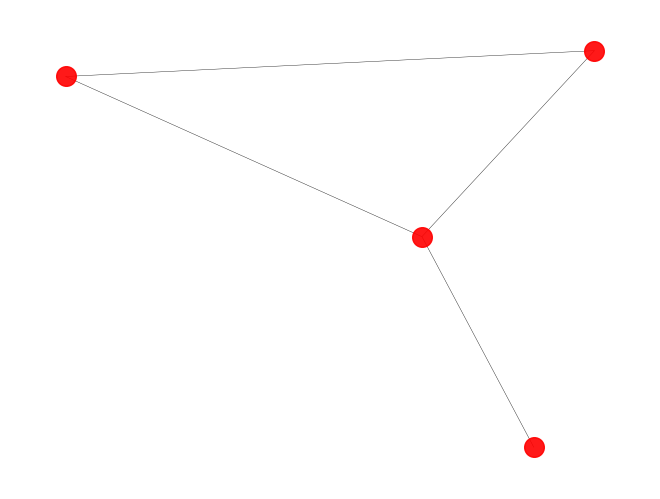

In [7]:
# let's plot the network!

# basic command
nx.draw(G, pos=nx.spring_layout(G),
        alpha=0.9,node_size=200,
        width=0.3,edge_color="Black",
        node_color="Red")

# there are many options

For all the options of "draw" refer to this https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx

As well as different graph layout https://networkx.github.io/documentation/stable/reference/drawing.html

### Saving a Visualisation

In [ ]:
# To save the visualisation, we need an additional module
import matplotlib.pyplot as plt

# The following command directs the output of plots to the notebook rather than to open separate windows for each
%matplotlib inline    

NameError: name 'plt' is not defined

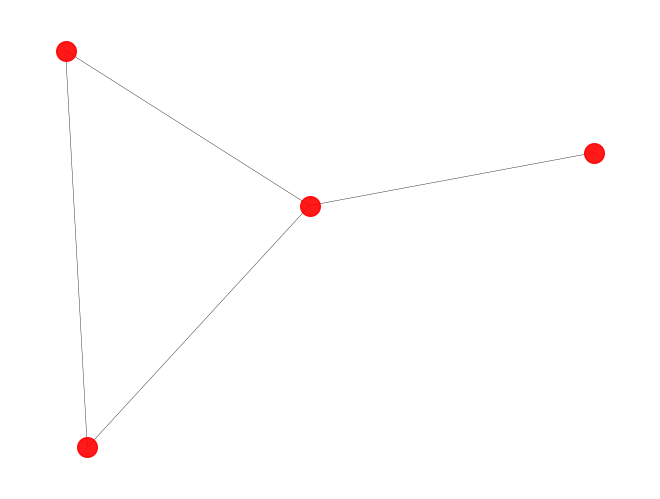

In [8]:
#Create the plot again

nx.draw(G, pos=nx.spring_layout(G),
        alpha=0.9,node_size=200,
        width=0.3,edge_color="Black",
        node_color="Red")
plt.savefig("figures/simple_net.png") # use the plt module to save as png
plt.show() # display

For all the options of "draw" refer to this https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx

As well as different graph layout https://networkx.github.io/documentation/stable/reference/drawing.html

### Importing an Edgelist from a File

In [9]:
# Typically, network data will be collected as edgelists and saved as a file

# network data can be stored in many different formats!
# before creating a network data structure from a file, you need to check which format has been used.

a=open("data/net1.txt","r")
for i in a:
    print (i)
    #n=i.strip().split()
    #print (n)
a.close()

1 2

3 4

5 6

7 8



In [10]:
# Each row is a string reporting an edge between two nodes. 

print (i) # the last row from the last command

# We can separate the node labels into a list with the sting function .split()
n=i.split()
print (n)

7 8

['7', '8']


In [11]:
# Separate the node labels into a list for each row of the file

a=open("data/net1.txt","r")
for i in a:
    n=i.split()
    print (n)
a.close()
# the output is a list of edges in a form that can be added to a Graph object (network)

['1', '2']
['3', '4']
['5', '6']
['7', '8']


In [14]:
# so we can easily create a Graph object (network) while reading the file

a=open("data/net1.txt","r")

G=nx.Graph()
for i in a:
    n=i.split()
    G.add_edge(n[0],n[1]) # each edge is added to the network
a.close()

print (G.number_of_nodes(),G.number_of_edges())
print (G.nodes())
print (G.edges())

8 4
['1', '2', '3', '4', '5', '6', '7', '8']
[('1', '2'), ('3', '4'), ('5', '6'), ('7', '8')]


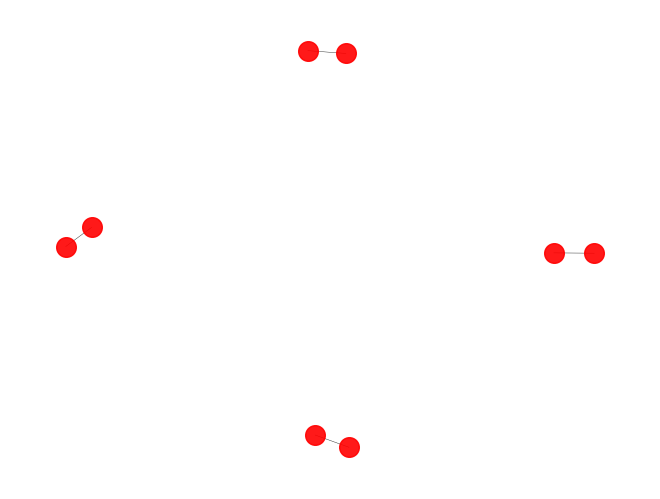

In [15]:
# Let's plot it

nx.draw(G, pos=nx.spring_layout(G),
        alpha=0.9,node_size=200,
        width=0.3,edge_color="Black",
        node_color="Red")

In [16]:
# let's consider another possible format

a=open("data/net2.txt","r")
for i in a:
    n=i.split()
    print (n)
a.close()

['1', '2', '10']
['2', '4', '12']
['5', '6', '13']
['7', '8', '34']


In [ ]:
# in this case we have a property of each edge, 
# for example the number of patents two companies have developped together
# # how do we store it?

In [17]:
G=nx.Graph()
a=open("data/net2.txt","r")
for i in a:
    n=i.split()
    G.add_edge(n[0],n[1],patents=int(n[2]))  # note how we converted the third value as integer
a.close()

In [18]:
# how do we access the data structure?

for i in G.edges():
    print (i[0],i[1],G[i[0]][i[1]]['patents'])

1 2 10
2 4 12
5 6 13
7 8 34


### Remember to Check the Column Separator!

In [19]:
# Sometimes the separator between nodes might not be a space
# A common format is a file using comma separated values: csv 

a=open("data/net4.txt","r")
for i in a:
    print (i)
a.close()

1,2

3,4

5,6

7,8



In [20]:
# What happens if we don't specify the separator?

a=open("data/net4.txt","r")
for i in a:
    n=i.split()
    print (n)
a.close()

['1,2']
['3,4']
['5,6']
['7,8']


In [22]:
# split() splits on space " "
# but there is no space in the first line '1,2'
# So only one element is stored in the record
#['1,2'] instead of the ['1','2'] we need

In [21]:
# We can easily deal with this situation by specifying the character
# that is used to separate the node labels, the comma:

a=open("data/net4.txt","r")
for i in a:
    n=i.split(',')  # The column separator is "," rather than space " "
    print (n)
a.close()

['1', '2\n']
['3', '4\n']
['5', '6\n']
['7', '8\n']


In [23]:
# Notice the hidden next line character included '\n'

# To remove hidden characters or extra spaces from the beginning or end
# of a string, we can use the string function .strip()

a=open("data/net4.txt","r")
for i in a:
    n=i.strip().split(',')
    print (n)
a.close()

['1', '2']
['3', '4']
['5', '6']
['7', '8']


## Real Network Data
Let's look at one of the datasets used in Assignment 1.   
Co-patenting between companies. Two or more companies share the registration of a patent.  

What does an edge between two nodes in this dataset represent?

In [24]:
# What does the data look like?

a=open("data/USPTO_2012_65_proj.tsv","r")
for i in a:
    n=i.strip().split(',')
    print (n)
a.close()

['Kabushiki Kaisha Tokai Rika Denki Seisakusho\tToyota Jidosha Kabushiki Kaisha']
['King Slide Works Co.', ' Ltd.\tKing Slide Technology Co.', ' Ltd.']
['Mold Technical Office Co.', ' Ltd.\tToyota Boshoku Kabushiki Kaisha']
['Mold Technical Office Co.', ' Ltd.\tToyota Tsusho Corporation']
['Frito-Lay North America', ' Inc.\tSonoco Development', ' Inc.']
['Braebum Asset Holdings', ' LLC.\tES Holding Dragoer APS']
['Tachi-S Engineering USA', ' Inc.\tWorld Class Pistols', ' Inc.']
['Shopin Lock Co.', ' Ltd.\tJin Tay Industries Co.', ' Ltd.']
['Honda Giken Kogyo Kabushiki Kaisha\tTS Tech Co.', ' Ltd.']
['Donnelly Corporation\tCarling Technologies', ' Inc.']
['Shanghai Huda Investment & Development Co.', ' Ltd.\tQinghai Xiwang Hi-Tech & Material Co.', ' Ltd.']
['Toyota Jidosha Kabushiki Kaisha\tToyota Boshoku Kabushiki Kaisha']
['Masco Corporation of Indiana\tMercury Plastics', ' Inc.']
['Hon Hai Precision Industry Co.', ' Ltd.\tHong Fu Jin Precision Industry (ShenZhen) Co.', ' Ltd.']
['Hon

#### Important for Assignment 1
**Note** that the allocated datasets as above have the extension ".tsv"  
This means the columns are separated by a Tab - represented by '\t' above

In [25]:
# Note separator above is '\t' (Tab)

a=open("data/USPTO_2012_65_proj.tsv","r")
G=nx.Graph()
for i in a:
    n=i.strip().split('\t')
    G.add_edge(n[0],n[1]) # each edge is added to the network
a.close()

print (G.number_of_nodes(),G.number_of_edges())

38 23


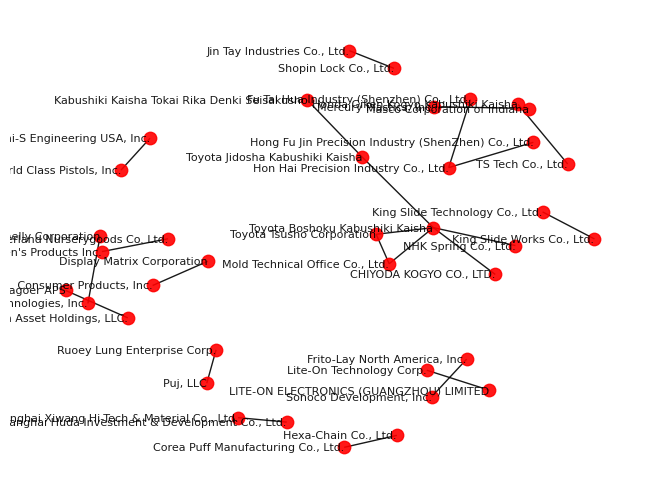

In [26]:
nx.draw(G, pos=nx.spring_layout(G,k=0.5),# k between 1 and 0 is the distance between nodes,
        alpha=0.9,node_size=80,
        width=1.0,edge_color="Black"
        ,node_color="Red",
        with_labels=True, font_size=8, horizontalalignment='right') # Add labels

In [27]:
# larger figure size
plt.figure(figsize=(12,12)) # increase the figure size

nx.draw(G, pos=nx.spring_layout(G,scale=0.2, k=0.5), # scale to reduce the layout within the image size
        alpha=0.9,node_size=120,
        width=1.5,edge_color="Black"
        ,node_color="Red",
        with_labels=True, font_size=8, horizontalalignment='right')

plt.show()

NameError: name 'plt' is not defined

### Node Attributes

Network analysts are often interested in whether particular positions in a network are related to some characteristic or attribute of the nodes. For example, senior managers may work closely together while others are less connected. Perhaps large firms collaborate with each other more than small firms do.

In [28]:
# let's read a network dataset
# there are two separated files
# an edge list
# a file with node's attributes
# let's start with the edge list
# as usual before doing anything we need to see the format

a=open("data/net1_edge_list.txt","r")
for i in a:
    n=i.strip().split()
    print (n)         
a.close()

['1', '2']
['2', '3']
['3', '1']
['2', '4']
['1', '4']
['1', '5']
['2', '5']
['3', '5']
['5', '6']
['6', '7']
['6', '8']
['6', '9']
['7', '8']
['7', '9']
['9', '10']
['6', '11']
['11', '12']
['11', '13']
['11', '14']
['12', '15']
['13', '14']
['12', '13']


In [29]:
# standard list of edges
# Create the graph objet
a=open("data/net1_edge_list.txt","r")
G=nx.Graph()
for i in a:
    n=i.strip().split()
    G.add_edge(n[0],n[1])
a.close()
print (G.number_of_nodes(),G.number_of_edges())

15 22


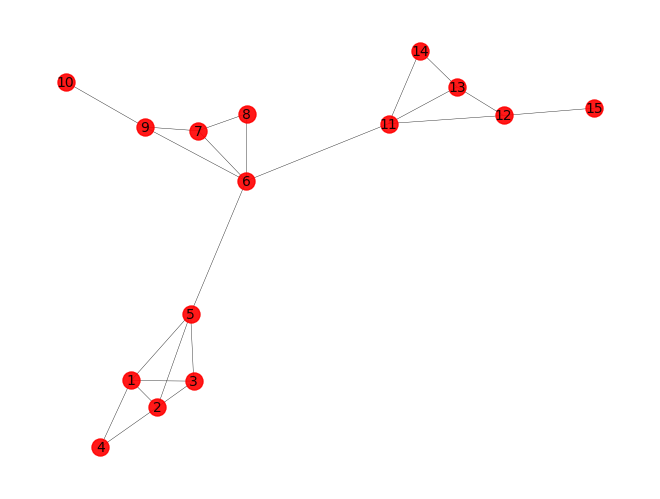

In [30]:
# let's plot the network!

# basic command
nx.draw(G, pos=nx.spring_layout(G),
        alpha=0.9,node_size=150,
        width=0.3,edge_color="Black"
        ,node_color="Red",
        with_labels=True,font_size=10)

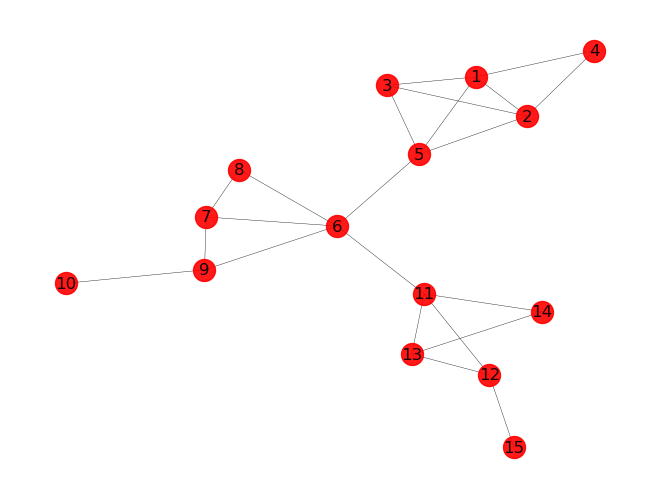

In [31]:
# let's change the layout!

nx.draw(G, pos=nx.kamada_kawai_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black"
        ,node_color="Red",with_labels=True,font_size=12)

In [32]:
# let's consider the attribute we have in the "net1_attributes.txt" file
a=open("data/net1_attributes.txt","r")
for i in a:
    n=i.strip().split()
    print (n)
a.close()

['ID', 'COUNTRY', 'EMPLOYEES']
['1', 'IT', '50']
['2', 'IT', '65']
['3', 'IT', '30']
['4', 'IT', '10']
['5', 'IT', '60']
['6', 'FR', '100']
['7', 'FR', '35']
['8', 'FR', '20']
['9', 'FR', '40']
['10', 'FR', '10']
['11', 'GE', '60']
['12', 'GE', '20']
['13', 'GE', '25']
['14', 'GE', '10']
['15', 'GE', '15']


In [33]:
# Add these values to the network as features of nodes

a=open("data/net1_attributes.txt","r")
c=0
for i in a:
    n=i.strip().split()
    if c>0:               # we need this to skip the first line
        ids=n[0]
        country=n[1]
        employees=n[2]
        
        G.nodes[ids]['country']=country    # now we have two properties/features for the two nodes
        G.nodes[ids]['employees']=int(employees)
        
    c+=1
    # now that we parsed them we can add as feature of each node 
    
a.close()

In [34]:
# What do we have as nodes in G?
for i in G.nodes():
    print (i,G.nodes[i])

1 {'country': 'IT', 'employees': 50}
2 {'country': 'IT', 'employees': 65}
3 {'country': 'IT', 'employees': 30}
4 {'country': 'IT', 'employees': 10}
5 {'country': 'IT', 'employees': 60}
6 {'country': 'FR', 'employees': 100}
7 {'country': 'FR', 'employees': 35}
8 {'country': 'FR', 'employees': 20}
9 {'country': 'FR', 'employees': 40}
10 {'country': 'FR', 'employees': 10}
11 {'country': 'GE', 'employees': 60}
12 {'country': 'GE', 'employees': 20}
13 {'country': 'GE', 'employees': 25}
14 {'country': 'GE', 'employees': 10}
15 {'country': 'GE', 'employees': 15}


In [35]:
# A dictionary with each node label

# how do we access the values directly? 
for i in G.nodes():
    print (i,G.nodes[i]['country'],G.nodes[i]['employees'])

1 IT 50
2 IT 65
3 IT 30
4 IT 10
5 IT 60
6 FR 100
7 FR 35
8 FR 20
9 FR 40
10 FR 10
11 GE 60
12 GE 20
13 GE 25
14 GE 10
15 GE 15


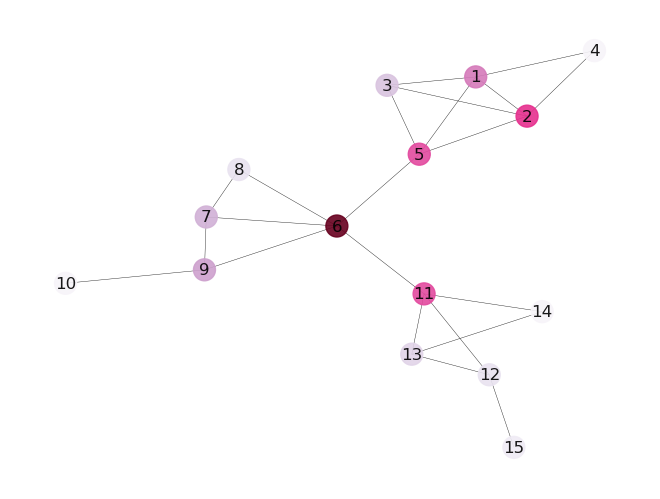

In [36]:
# We can incorporate the node information into the plot by coloring the nodes according to these attributes
# for example let's consider first the number of employees in each company
# in order to color nodes according to this we need to create a list (ordered) 
# with the values

color_code=[]  # this is the list
for i in G.nodes():
    color_code.append(G.nodes[i]['employees'])  # each element in the list is the number of employees of each node

# let's plot it
# we need to specify the color map "cmap" and instead of setting the color by hand as before we pass 
# the list!
nx.draw(G, pos=nx.kamada_kawai_layout(G),alpha=0.9,
        node_size=250,width=0.3,edge_color="Black",cmap='PuRd',
        node_color=color_code,with_labels=True,font_size=12)


There are plenty of color maps https://matplotlib.org/examples/color/colormaps_reference.html

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['IT', 'IT', 'IT', 'IT', 'IT', 'FR', 'FR', 'FR', 'FR', 'FR', 'GE', 'GE', 'GE', 'GE', 'GE']

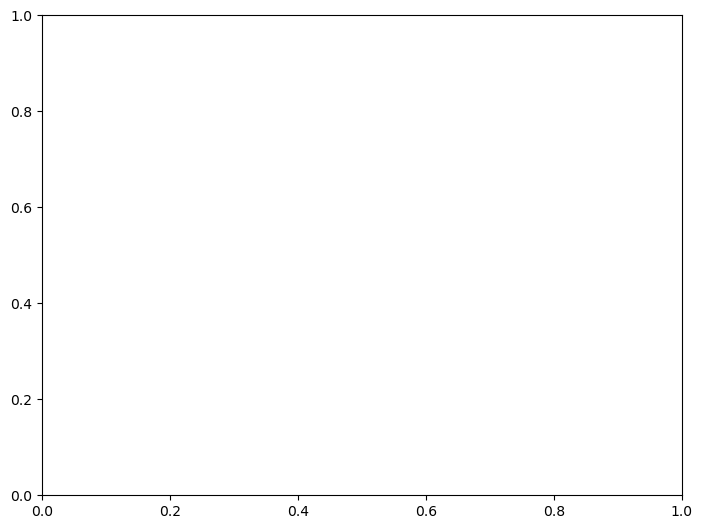

In [37]:
# what about the other feature?
# that's not a number per se, it is categorical
# what does this mean?

# let's try brute force first
color_code=[]  # this is the list
for i in G.nodes():
    color_code.append(G.nodes[i]['country'])  # each element in the list is the number of employees of each node

# let's plot it
# we need to specify the color map "cmap" and instead of setting the color by hand as before we pass 
# the list!
nx.draw(G, pos=nx.kamada_kawai_layout(G),alpha=0.9,
        node_size=250,width=0.3,edge_color="Black",cmap='PuRd',
        node_color=color_code,with_labels=True,font_size=12)

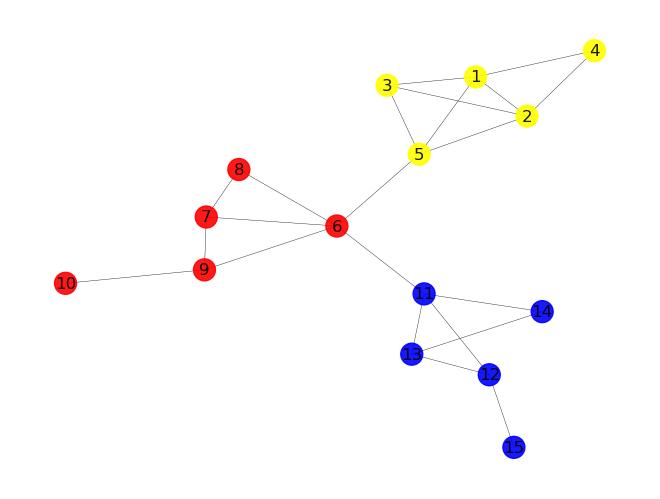

In [38]:
# it does not work, since it is not clear how to convert a string to a color
# we can do it by hand though!
# let's create our own palette with a dictionary

color_scheme={}
color_scheme["IT"]='Yellow'
color_scheme["FR"]='Red'
color_scheme["GE"]='Blue'

color_code=[]  # this is the list
for i in G.nodes():
    color_code.append(color_scheme[G.nodes[i]['country']])  
    # each element in the list is the country of each node

# let's plot it
# we need to specify the color map "cmap" and instead of setting the color by hand as before we pass 
# the list!
nx.draw(G, pos=nx.kamada_kawai_layout(G),alpha=0.9,
        node_size=250,width=0.3,edge_color="Black",
        node_color=color_code,with_labels=True,font_size=12)

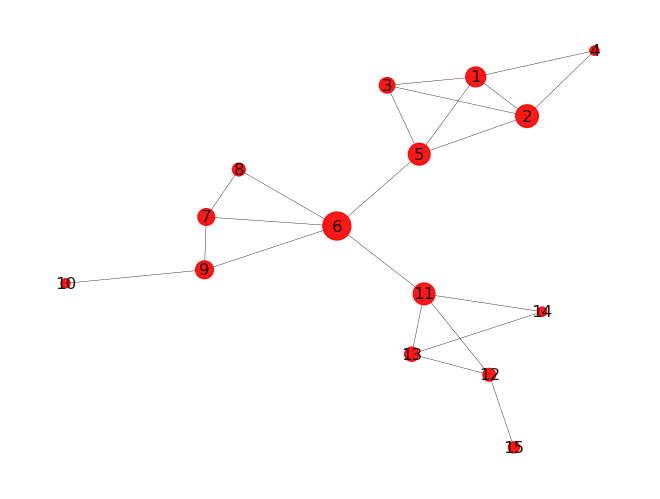

In [39]:
# Where a node attribute is numerical we can vary the node size by this number
# For example firms with more employees could be indicated by size rather than by colour
# As for the colours, we need to just pass an ordered list with the values

size_employees=[]  # this is the list
for i in G.nodes():
    size_employees.append((G.nodes[i]['employees']+1)*4)  
    # each element in the list is the number of employees of each node
    # the +1 handles any missing values (0)
    # the *4 is to make the size visually useful - can use any multiplier that works

nx.draw(G, pos=nx.kamada_kawai_layout(G),alpha=0.9,
        node_size=size_employees,width=0.3,edge_color="Black",
        node_color="Red",with_labels=True,font_size=12)

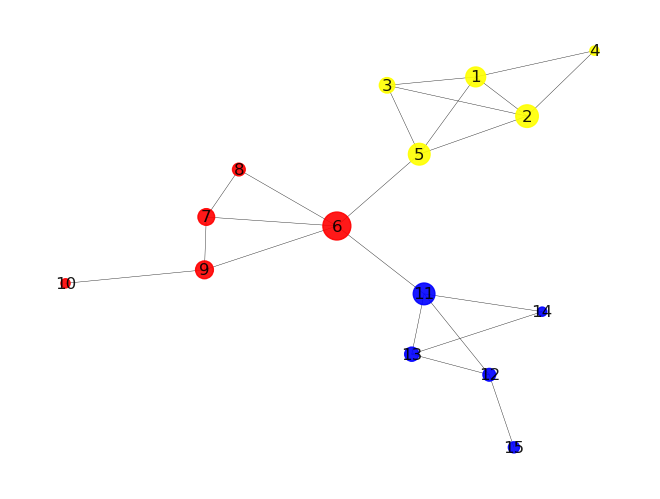

In [40]:
# Plot two node attributes simultaneously - colour and size

color_scheme={}
color_scheme["IT"]='Yellow'
color_scheme["FR"]='Red'
color_scheme["GE"]='Blue'

color_code=[]  # this is the country colour list
for i in G.nodes():
    color_code.append(color_scheme[G.nodes[i]['country']])  
    # each element in the list is the country of each node

size_employees=[]  # this is the employee size list
for i in G.nodes():
    size_employees.append((G.nodes[i]['employees']+1)*4)  
    # each element in the list is the number of employees of each node
    # the +1 handles any missing values (0)
    # the *4 is to make the size visually useful - can use any multiplier that works

nx.draw(G, pos=nx.kamada_kawai_layout(G),alpha=0.9,
        node_size=size_employees,width=0.3,edge_color="Black",
        node_color=color_code,with_labels=True,font_size=12)